<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/logo_Classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.import packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf 

tf.__version__

'2.4.1'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n') 

!nvidia-smi

GPU Information - /device:GPU:0 

Tue Mar 23 04:10:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
import keras 

keras.__version__

'2.4.3'

## 1.Google Drive Mount

In [5]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  4 04:42 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


## 2.Data Preprocessing

In [7]:

!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [8]:
#validation은 test로 수행(데이터가 적음)
train_dir = 'train' 
test_dir = 'test'

In [62]:
from keras.preprocessing.image import ImageDataGenerator

#normalization
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)

#resizing
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size = (75, 75), 
    batch_size = 8, 
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (75, 75), 
    batch_size = 8, 
    class_mode = 'categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [63]:
for data_batch, labels_batch in train_generator: 
  print('배치 데이터 크기:', data_batch.shape) 
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (8, 75, 75, 3)
배치 레이블 크기: (8, 27)


In [65]:
labels_batch

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

## 3.CNN Keras Modeling

In [64]:
from keras import layers 
from keras import models

#CNN
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (75, 75, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))


#DNN
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation = 'relu')) 
model.add(layers.Dense(27, activation = 'softmax'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)             

In [66]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [67]:
%%time
Hist_dandc = model.fit(train_generator, 
                       steps_per_epoch = 62, #(8 * 62 = 약 490개 : 전체 데이터의 사이즈에 맞춘다)
                       epochs = 200,
                       validation_data = test_generator, 
                       validation_steps = 22)

Epoch 1/200
62/62 [==============================] - 2s 21ms/step - loss: 3.3109 - accuracy: 0.0761 - val_loss: 3.1408 - val_accuracy: 0.0795
Epoch 2/200
62/62 [==============================] - 1s 15ms/step - loss: 2.7319 - accuracy: 0.2326 - val_loss: 2.7618 - val_accuracy: 0.2841
Epoch 3/200
62/62 [==============================] - 1s 16ms/step - loss: 2.0094 - accuracy: 0.4282 - val_loss: 2.3090 - val_accuracy: 0.4091
Epoch 4/200
62/62 [==============================] - 1s 15ms/step - loss: 1.2913 - accuracy: 0.6146 - val_loss: 2.3427 - val_accuracy: 0.4602
Epoch 5/200
62/62 [==============================] - 1s 16ms/step - loss: 0.7829 - accuracy: 0.7644 - val_loss: 2.5004 - val_accuracy: 0.5057
Epoch 6/200
62/62 [==============================] - 1s 16ms/step - loss: 0.4113 - accuracy: 0.8701 - val_loss: 2.7317 - val_accuracy: 0.4886
Epoch 7/200
62/62 [==============================] - 1s 16ms/step - loss: 0.2090 - accuracy: 0.9238 - val_loss: 3.1247 - val_accuracy: 0.5000
Epoch 

## 4.Result Visualization

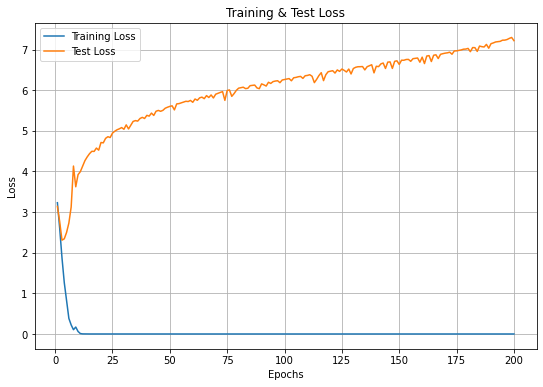

In [68]:
#Loss
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['loss']) 
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Test Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Test Loss']) 
plt.grid() 
plt.show()

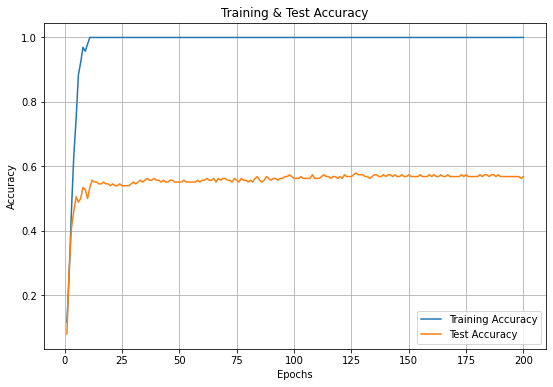

In [69]:
#Accuracy
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['accuracy']) 
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Test Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Test Accuracy']) 
plt.grid() 
plt.show()

In [70]:
#Loss&Accuracy : 데이터가 더 많으면 정확도가 더 좋아질 것 같다

loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 0s 6ms/step - loss: 7.2649 - accuracy: 0.5650
Loss = 7.26494
Accuracy = 0.56497
